# Method for $d=3$ (Algorithm 2)

This notebook contains a complete working example of Algorithm 1 from the paper 

<i>Sampling triangulations of manifolds using Monte Carlo methods</i>, by <a href="https://www.maths.usyd.edu.au/u/ega/">Eduardo Altmann</a> and <a href="https://sites.google.com/view/jonathan-spreer/">Jonathan Spreer</a>, <a href="https://arxiv.org/abs/2310.07372"> arXiv:2310.07372 </a>.


In [1]:
# Imports
import time, math, random, sys

# import all functions etc. from regina
from regina import *

# Functions to perform MCMC in d=2
sys.path.append("./src/")
from functions3d import *

### Initialization

In [2]:
#choose the paramter gamma of the MCMC method
gamma=1/5

# Simple inital state for d=3:
iso = "cMcabbgqs"
t = Triangulation3.fromIsoSig(iso)

### Simple iterations

In [5]:
iterate(iso,gamma,steps=10)

'dLQbcccaigs'

Properties of the (new) triangulation

In [4]:
isoNew = iterate(iso,gamma,steps=10)
tNew=Triangulation3.fromIsoSig(isoNew) # Regina triangulation
fNew = tNew.fVector()
print(tNew.detail())

Size of the skeleton:
  Tetrahedra: 6
  Triangles: 12
  Edges: 7
  Vertices: 1

Tetrahedron gluing:
  Tet  |  glued to:      (012)      (013)      (023)      (123)
  -----+-------------------------------------------------------
    0  |               3 (012)    1 (013)    2 (023)    1 (123)
    1  |               2 (130)    0 (013)    4 (023)    0 (123)
    2  |               3 (032)    1 (201)    0 (023)    4 (231)
    3  |               0 (012)    4 (210)    2 (021)    5 (123)
    4  |               3 (310)    5 (310)    1 (023)    2 (312)
    5  |               5 (203)    4 (310)    5 (102)    3 (123)

Vertices:
  Tet  |  vertex:    0   1   2   3
  -----+--------------------------
    0  |             0   0   0   0
    1  |             0   0   0   0
    2  |             0   0   0   0
    3  |             0   0   0   0
    4  |             0   0   0   0
    5  |             0   0   0   0

Edges:
  Tet  |  edge:   01  02  03  12  13  23
  -----+--------------------------------
    0  

### MCMC convergence

Here we compute and plot how the size of the triangulation evolves with the number of iterations

In [5]:
ns=[]
isoNew=iso
for t in range(600):
    isoNew=iterate(isoNew,gamma)
    tNew=Triangulation3.fromIsoSig(isoNew) # Regina triangulation
    fNew = tNew.fVector()
    ns.append(fNew[3])

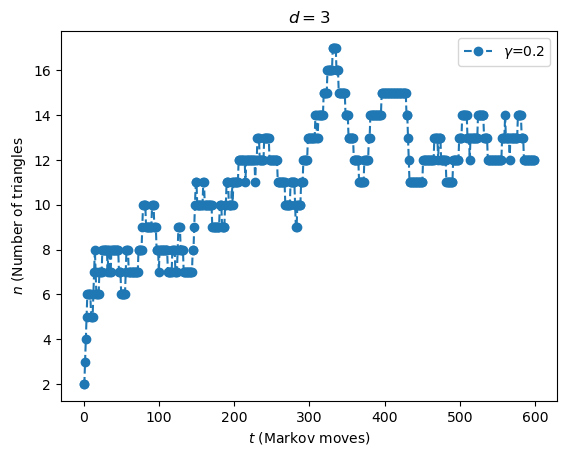

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(len(ns)),ns,"--o",label=r"$\gamma$="+str(gamma))
plt.title(r"$d=3$")
plt.xlabel(r"$t$ (Markov moves)")
plt.ylabel(r"$n$ (Number of triangles")
plt.legend()
plt.show()

### Sampling data

These functions allow for a more efficient sampling of triangulations

In [7]:
mcmc3d(iso,gamma)

collecting triangulation 1  of  10  : nLvAvMAPQkcdejjiklimmlmlavaiavxpcdawsw
collecting triangulation 2  of  10  : lMLvMLPQcabdggjhjikjkgagasadknfff
collecting triangulation 3  of  10  : lLwPzwAQcacefggjiijkkbgtchhfjjklg
collecting triangulation 4  of  10  : nMvvLLQAQkabiglhhlkkmjmmvavoicgahitfcg
collecting triangulation 5  of  10  : lMvvLAQQcabgfhihikkkjgagcnoooiiic
collecting triangulation 6  of  10  : kLvwAMQkadegihijjjibascacatdia
collecting triangulation 7  of  10  : nLwvLwMQQkachgkjmijlmlkmbgpcuipgbgkjvv
collecting triangulation 8  of  10  : jLvAzQQafeeghiihibhpcohmdib
collecting triangulation 9  of  10  : jLLPMzQcdeffghiiiacaeacamgg
collecting triangulation 10  of  10  : kLMLwLQkacdfegjijijbgtfvogfgbc


True

We can choose the number of samples, the interval between collecting samples, and the offset starting from which they're collected:

In [8]:
ttt = time.time()
mcmc3d(iso,gamma,samples=20,offset=100,interval=200)
# interval: (number of steps between samples)
# offset (number of omitted samples at beginning of sequence)
print(time.time()-ttt)

collecting triangulation 1  of  20  : jLMvAQPacdeggghiibgmgaxiaaj
collecting triangulation 2  of  20  : lMLvLAMQcabdhfigjkjkkoaobbufqpnof
collecting triangulation 3  of  20  : lLwPvAQMcacdfggjijikkbglraiogogmg
collecting triangulation 4  of  20  : oLLwMMwzQPcaddegfhhkmklnmnbaacnvhhtlgjxcf
collecting triangulation 5  of  20  : iLLMzQcadddehgghbhaaflicc
collecting triangulation 6  of  20  : kLLMLAPkaddeffhhijjbaaxnvwoowo
collecting triangulation 7  of  20  : oLLALPwMAPcaeddhhigjlkkmnnbqaaaxagpkbvfkf
collecting triangulation 8  of  20  : pLwLLwvPQQQaceefinkokklmmnobgbcgftbavvvsvcf
collecting triangulation 9  of  20  : oLMvAzzQwQcacdgehklijjmnnnbgaagtqafkfmevv
collecting triangulation 10  of  20  : mLMvAvAQQacdgfgiilkjllbgpmooffqwbii
collecting triangulation 11  of  20  : nLAvvPQPAkabckkhijkjllmmbcjssvkkrgqqvg
collecting triangulation 12  of  20  : mLAvPzMQPaccgehjkiikllbggtcwiahvctv
collecting triangulation 13  of  20  : lLLLALMQcaefdfihkjkkjbaansxdbccfo
collecting triangulation 14  of  2

For longer simulations, it is best to save the sampled triangulations to a file (in the folder "output"), which can later be studied.

In [9]:
ttt = time.time()
mcmc3d(iso,gamma,samples=100,offset=1000,verbose=False,printToFile="trial1")
print("time spent:",time.time()-ttt)

time spent: 4.647906541824341


In [10]:
!ls outputs/mcmc3d*

outputs/mcmc3d_trial1_gamma_0.2_samples_100.txt
